# SpaceX Falcon 9 First Stage Landing Prediction

## Exploring and preparing Data with Visualization and Feature Engineering


## Objectives

Perform EDA and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries 


In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd

# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices,
     # along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. 
        # We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt

#Seaborn is a Python data visualization library based on matplotlib.
        # It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


In [2]:
df=pd.read_csv(r"data_files/spacex_dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### Visualize the relationship between Flight Number and Payload Mass

let's see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


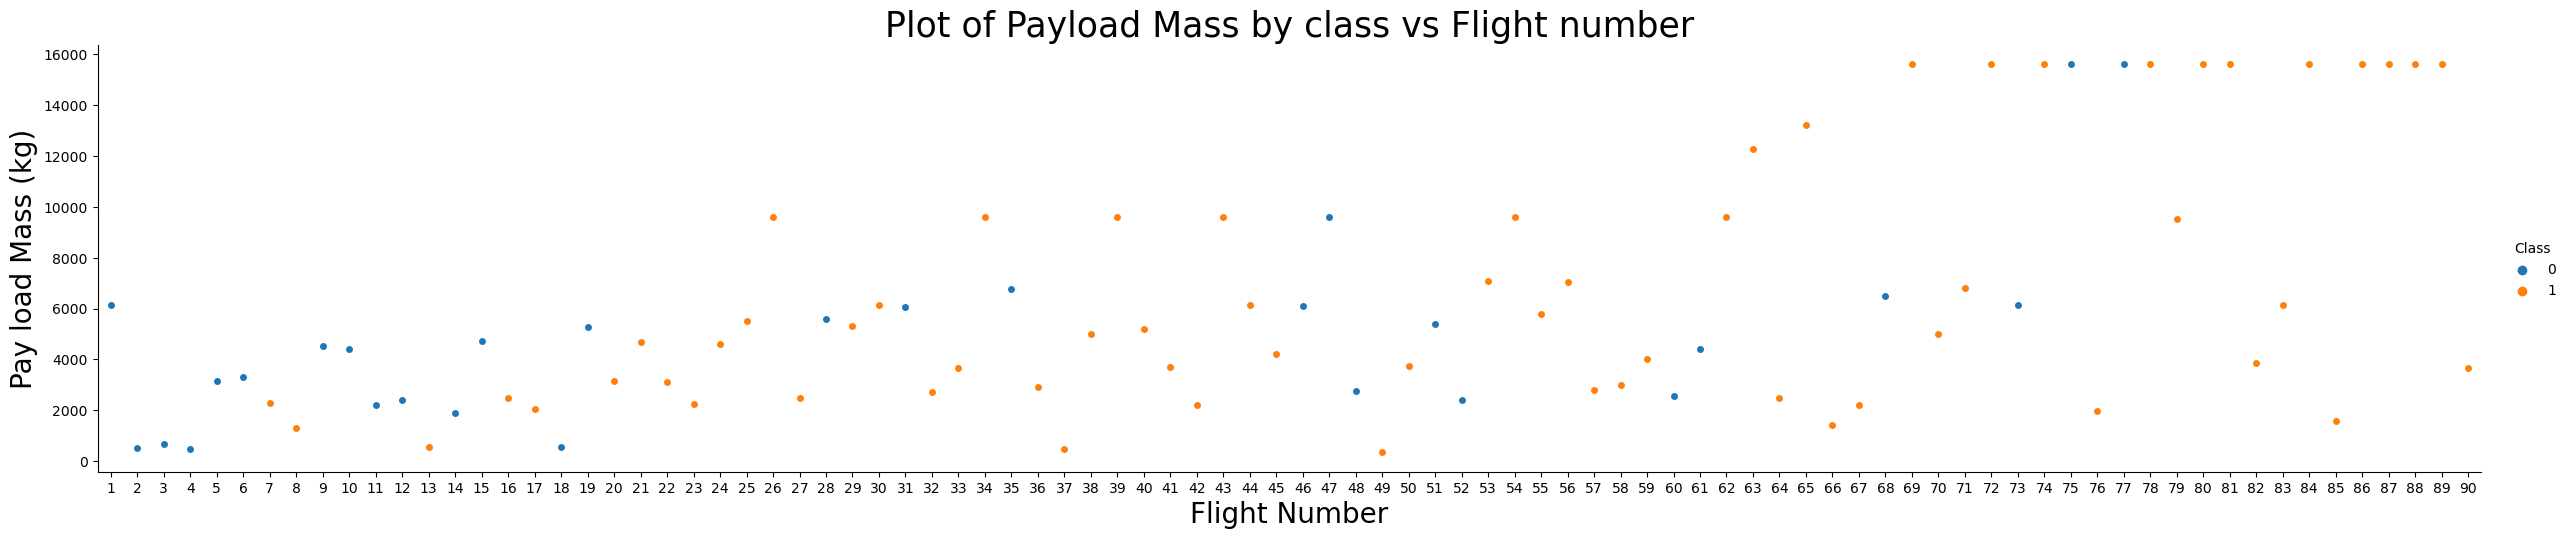

In [3]:
sns.catplot( x="FlightNumber",y="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.title("Plot of Payload Mass by class vs Flight number",fontsize = 25)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


###  Visualize the relationship between Flight Number and Launch Site


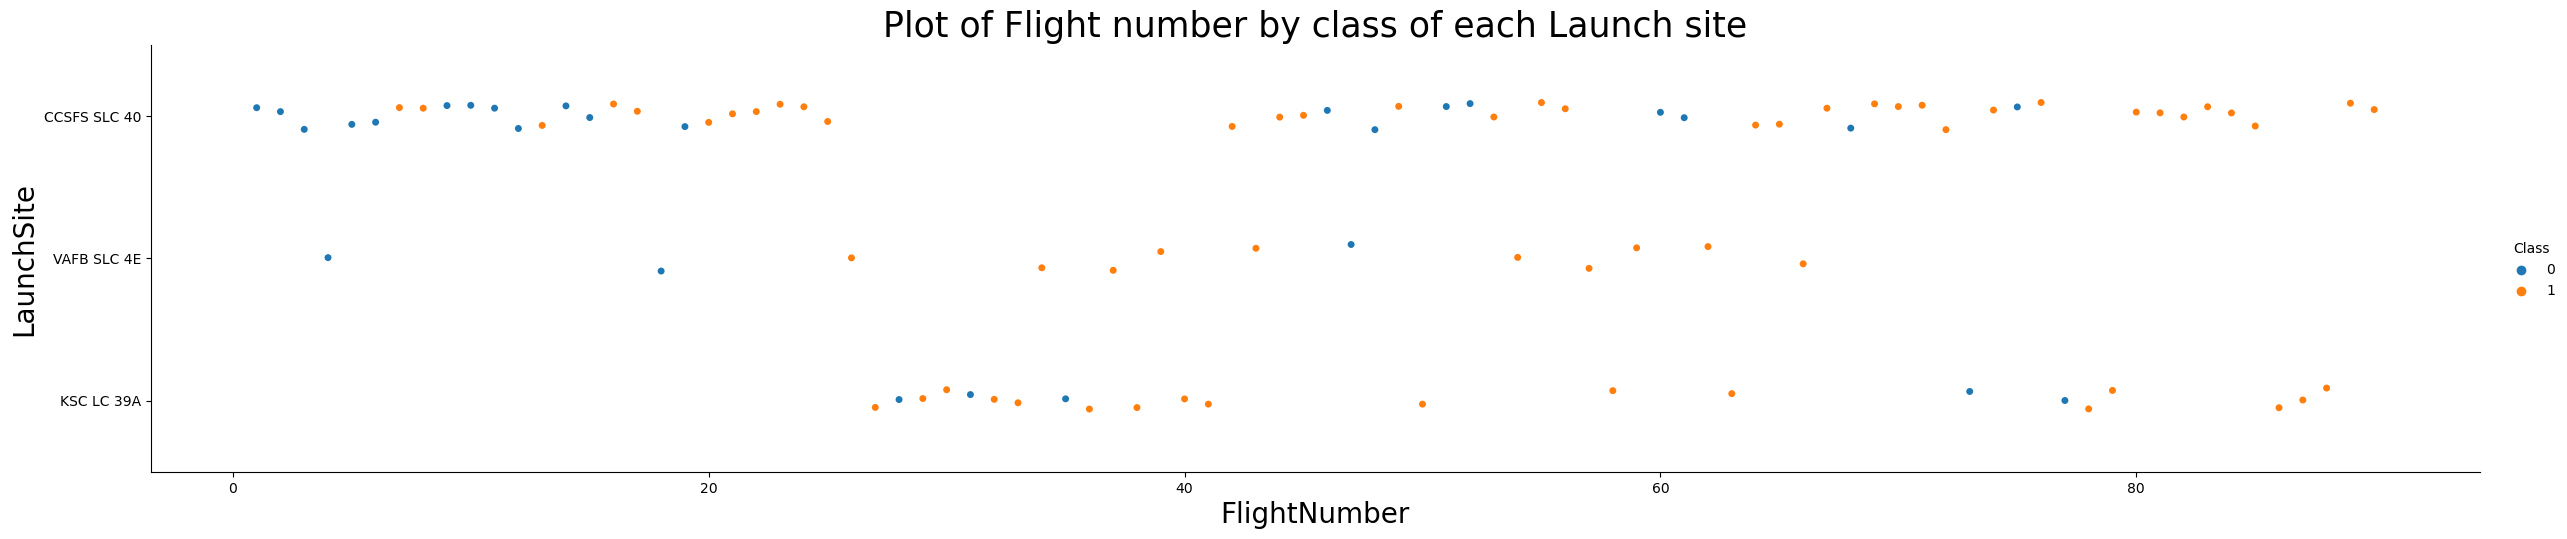

In [4]:
sns.catplot(x = 'FlightNumber', y = 'LaunchSite',data = df,hue = 'Class',aspect = 5)
plt.xlabel('FlightNumber',fontsize= 20)
plt.ylabel('LaunchSite',fontsize= 20)
plt.title("Plot of Flight number by class of each Launch site",fontsize = 25)
plt.show()

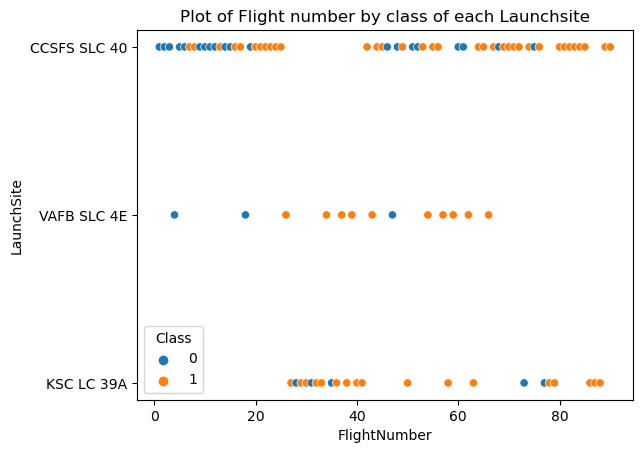

In [5]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.scatterplot(x = 'FlightNumber', y = 'LaunchSite',data = df,hue = 'Class')
plt.xlabel('FlightNumber')
plt.ylabel('LaunchSite')
plt.title("Plot of Flight number by class of each Launchsite")
plt.show()

###  Visualize the relationship between Payload and Launch Site

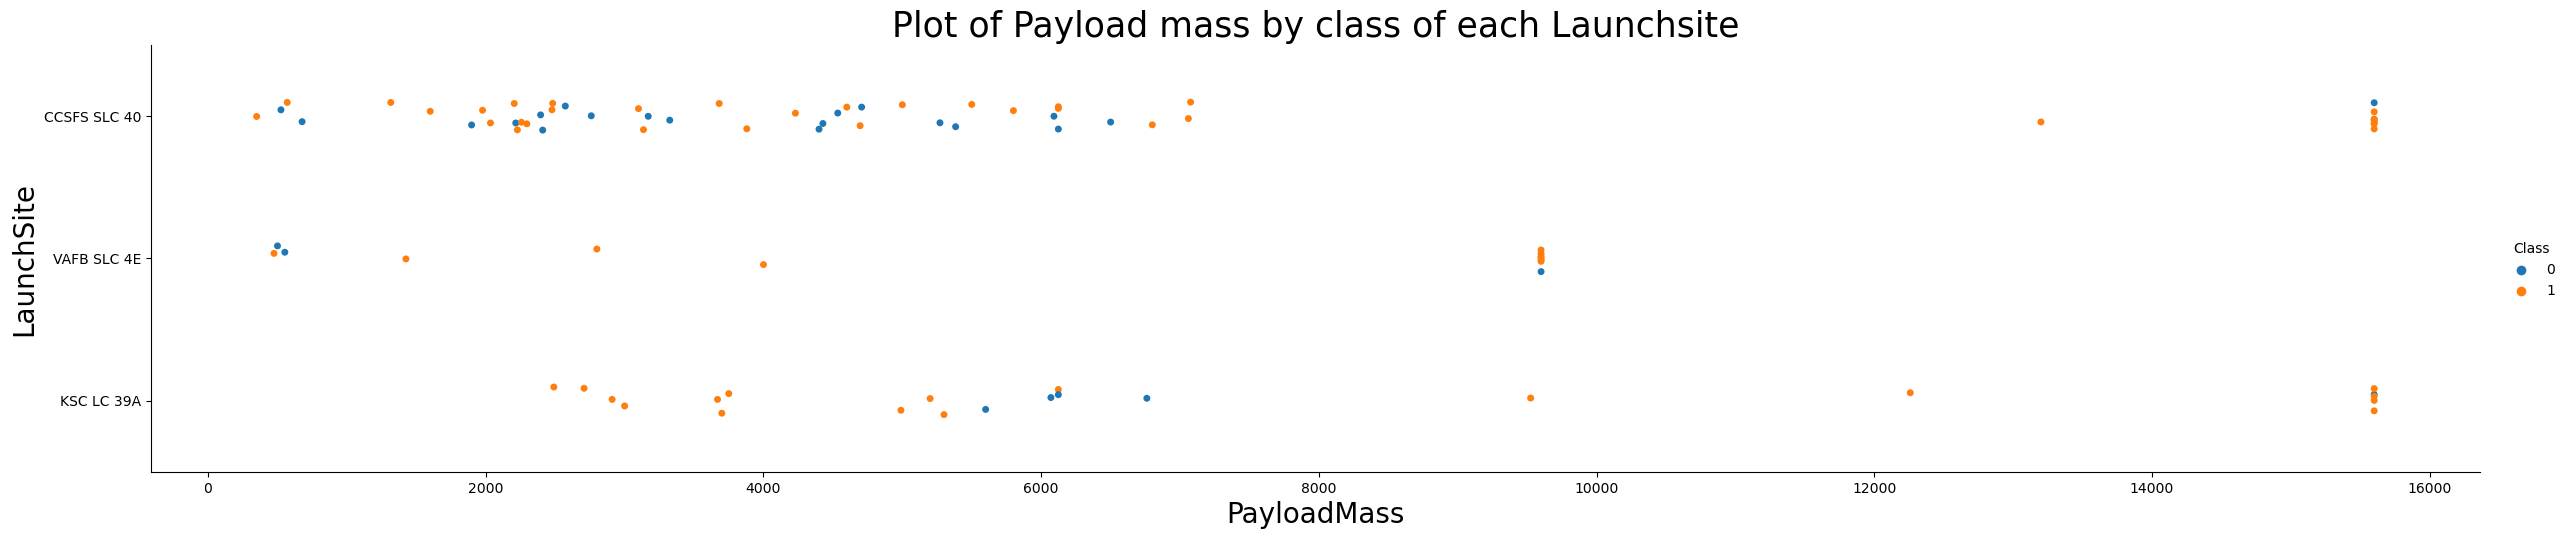

In [6]:
sns.catplot(x = 'PayloadMass', y = 'LaunchSite',data = df,hue = 'Class',aspect = 5)
plt.xlabel('PayloadMass',fontsize = 20)
plt.ylabel('LaunchSite',fontsize = 20)
plt.title("Plot of Payload mass by class of each Launchsite",fontsize = 25)
plt.show()

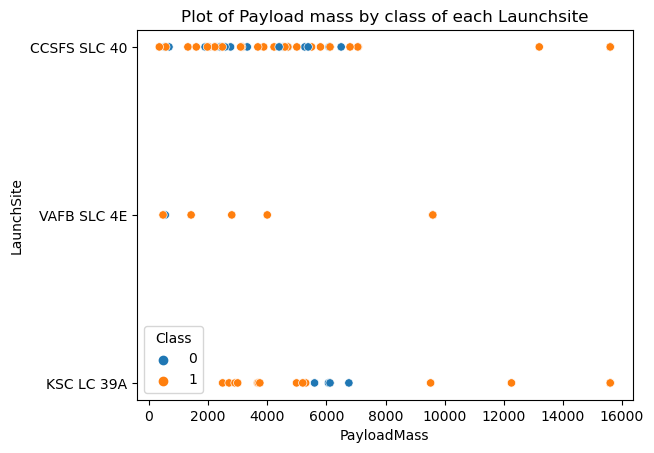

In [7]:
sns.scatterplot(x = 'PayloadMass', y = 'LaunchSite',data = df,hue = 'Class')
plt.xlabel('PayloadMass')
plt.ylabel('LaunchSite')
plt.title("Plot of Payload mass by class of each Launchsite")
plt.show()

Now if we observe Payload Vs. Launch Site scatter point chart then we will find for the VAFB-SLC launchsite there are no rockets  launched for heavypayload mass(greater than 10000).


### Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the success rate of each orbit


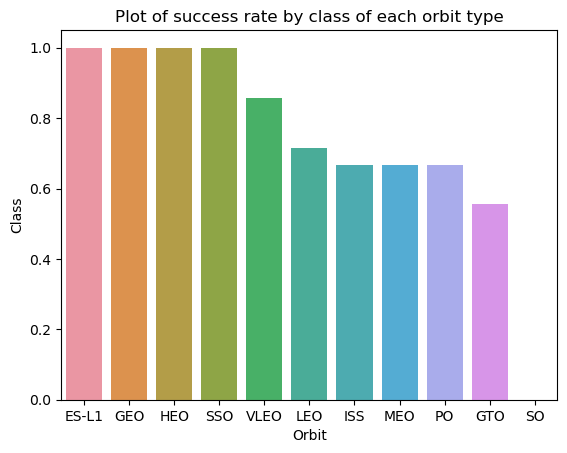

In [8]:
# using groupby method on Orbit column and get the meanreset_indexass column

# df1 = df.groupby(['Orbit', 'Class'])['Class'].agg(['mean']).reset_index()
df1 = df.groupby(by=['Orbit'])['Class'].mean().sort_values(ascending=False).reset_index()
sns.barplot(y = 'Class', x = 'Orbit',data = df1)
plt.xlabel('Orbit')
plt.ylabel('Class')
plt.title("Plot of success rate by class of each orbit type")
plt.show()

Now we can see from the ploted bar chart, ES-L1,GEO,HEO,SSO,VLEO have high sucess rate.

### Visualize the relationship between FlightNumber and Orbit type

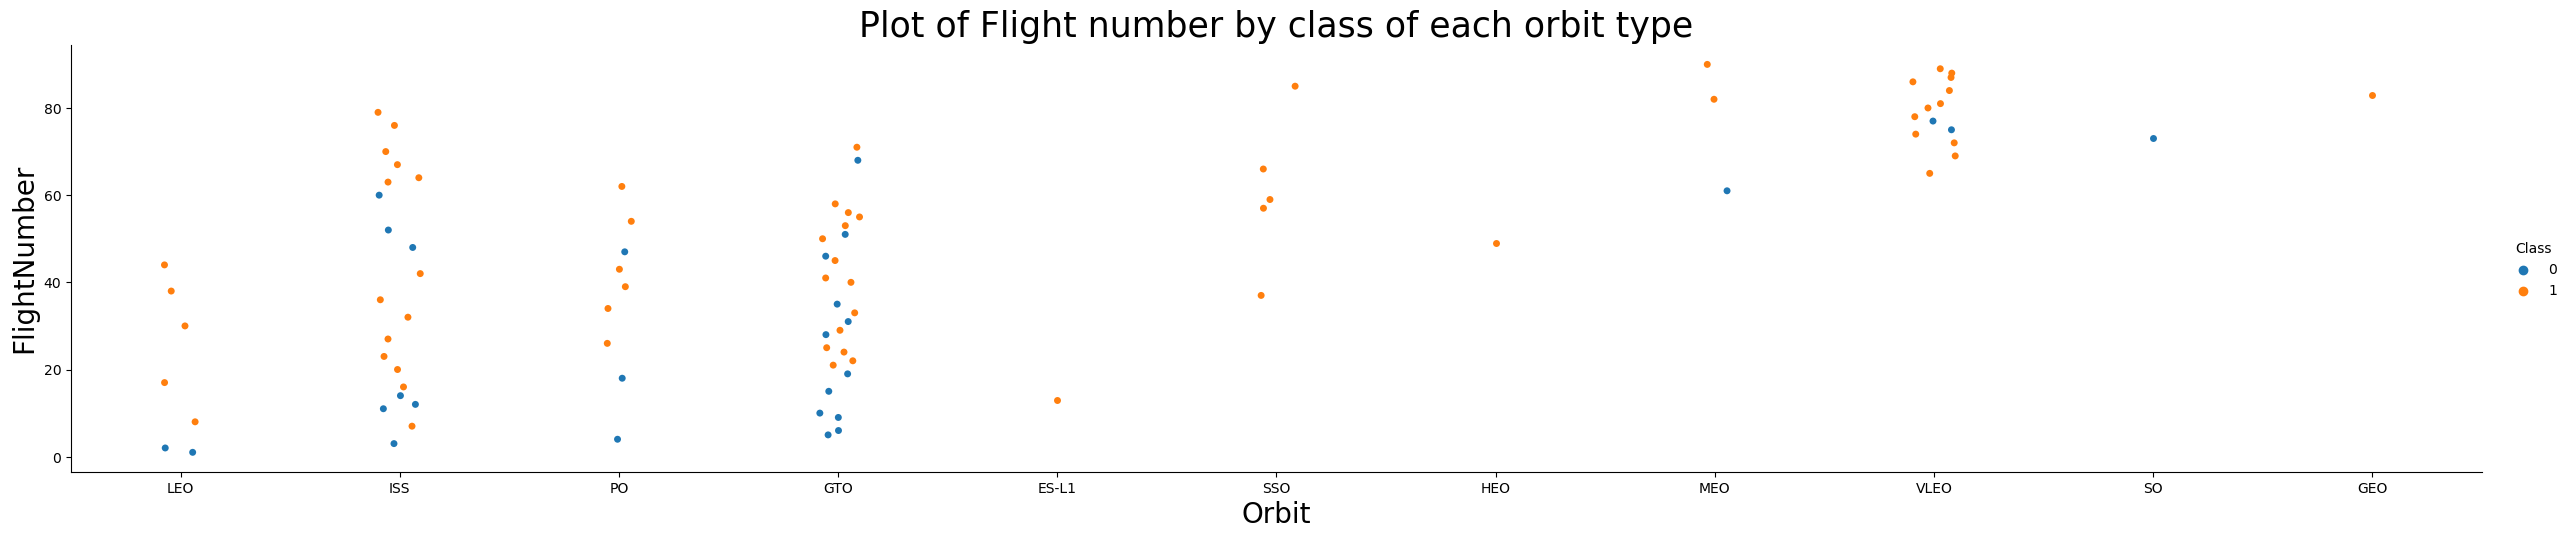

In [9]:
sns.catplot(x = 'Orbit',y = 'FlightNumber',hue = 'Class',data = df, aspect = 5)
plt.xlabel('Orbit',fontsize = 20)
plt.ylabel('FlightNumber',fontsize = 20)
plt.title("Plot of Flight number by class of each orbit type",fontsize = 25)
plt.show()

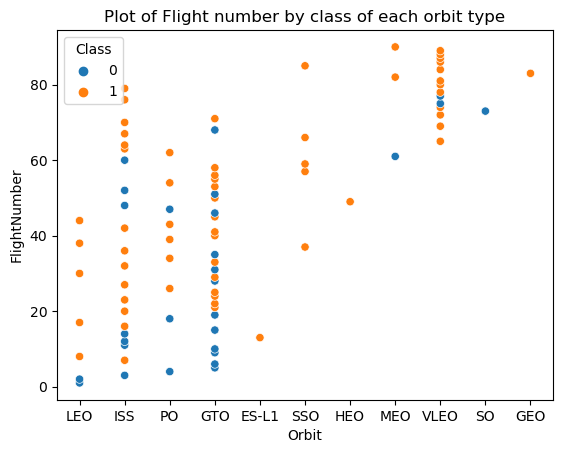

In [10]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(x = 'Orbit',y = 'FlightNumber',hue = 'Class',data = df)
plt.xlabel('Orbit')
plt.ylabel('FlightNumber')
plt.title("Plot of Flight number by class of each orbit type")
plt.show()

We can see that in the LEO orbit the Success appears related to the number of flights; on the other hand,for GTO orbit there seems to be no relationship between flight number.

### Visualize the relationship between Payload and Orbit type

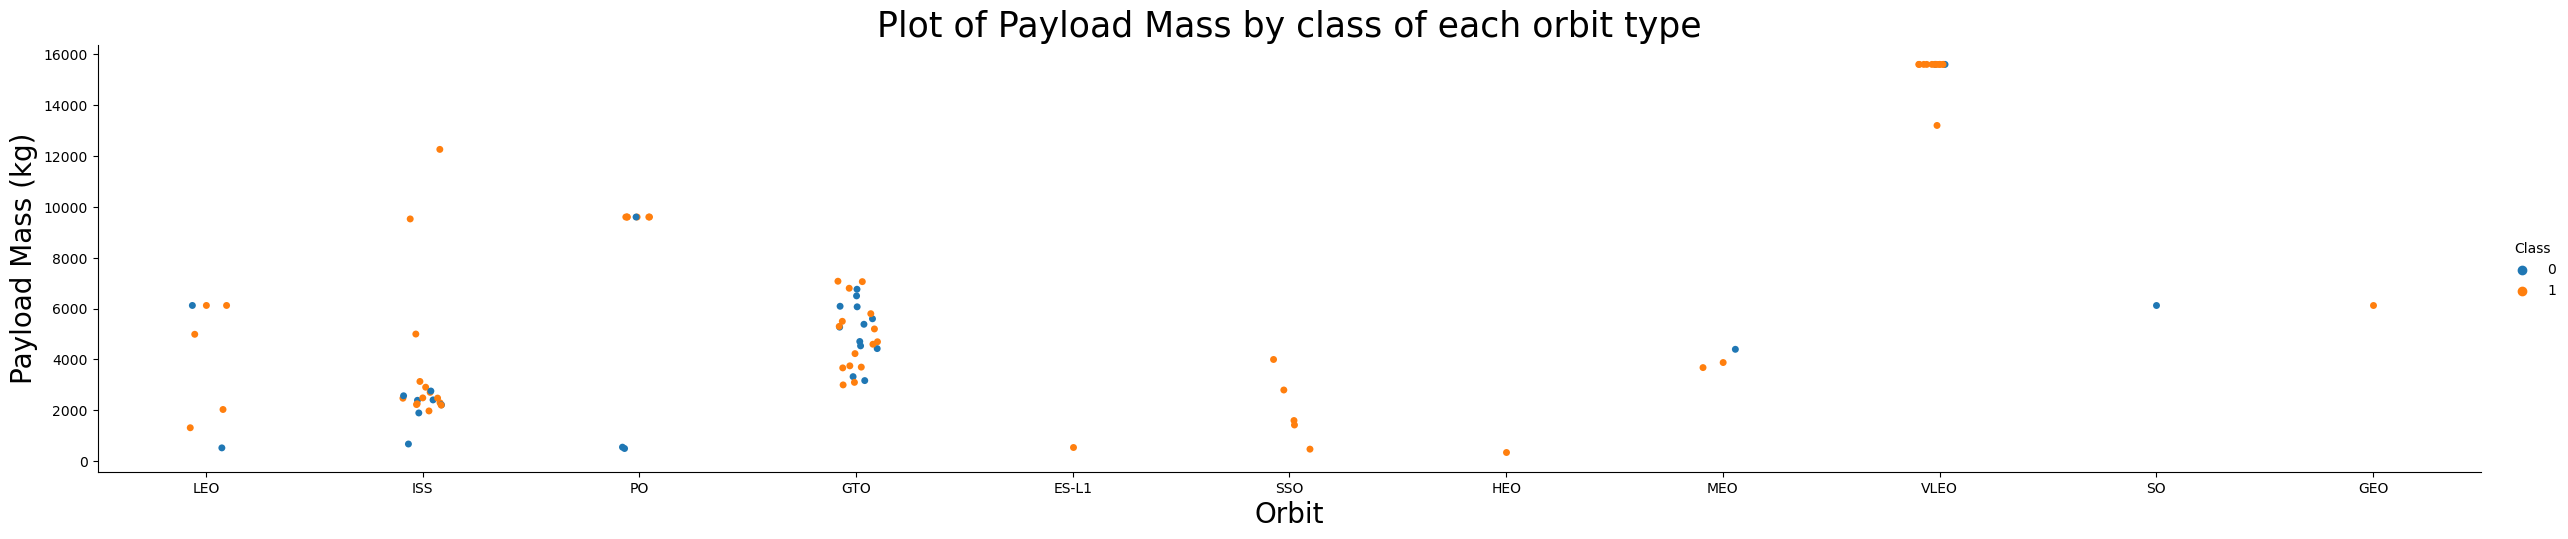

In [11]:
sns.catplot(x = 'Orbit',y = 'PayloadMass',hue = 'Class',data = df, aspect = 5)
plt.xlabel('Orbit',fontsize = 20)
plt.ylabel('Payload Mass (kg)',fontsize = 20)
plt.title("Plot of Payload Mass by class of each orbit type",fontsize = 25)
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


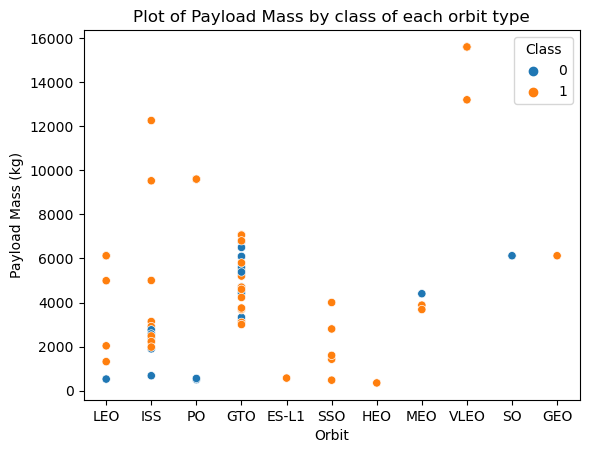

In [12]:
# Plotting a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(x = 'Orbit',y = 'PayloadMass',hue = 'Class',data = df)
plt.xlabel('Orbit')
plt.ylabel('Payload Mass (kg)')
plt.title("Plot of Payload Mass by class of each orbit type")
plt.show()

With heavy payloads the successful landing or positive landing rate are more for PO,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


###  Visualize the relationship between Success rate and Year

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


In [13]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


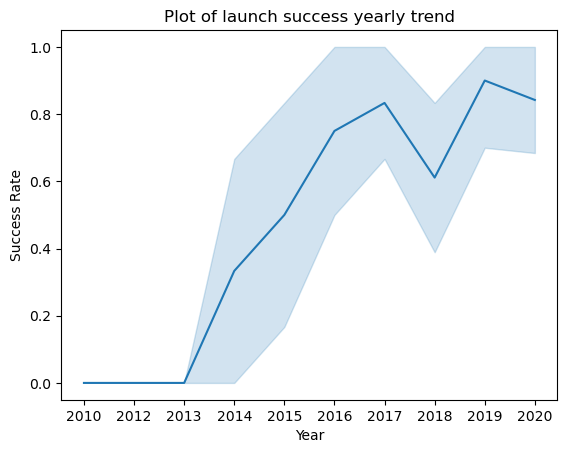

In [14]:
# Plotting a line chart with x axis to be the extracted year and y axis to be the success rate
sns.lineplot(x = 'Date', y= 'Class',data = df)
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Plot of launch success yearly trend')
plt.show()

we can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now,we get some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [15]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [16]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Orbit         90 non-null     object 
 3   LaunchSite    90 non-null     object 
 4   Flights       90 non-null     int64  
 5   GridFins      90 non-null     bool   
 6   Reused        90 non-null     bool   
 7   Legs          90 non-null     bool   
 8   LandingPad    64 non-null     object 
 9   Block         90 non-null     float64
 10  ReusedCount   90 non-null     int64  
 11  Serial        90 non-null     object 
dtypes: bool(3), float64(2), int64(3), object(4)
memory usage: 6.7+ KB


###  Create dummy variables to categorical columns

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [17]:
# Using get_dummies() function on the categorical columns
cols_with_cat = [col for col in features if features[col].dtype == 'object']
# cols_with_cat

features_one_hot = pd.get_dummies(data = features, columns= cols_with_cat)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Casting all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [18]:
features_one_hot.astype(float)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
features_one_hot.to_csv('spaceX_dataset_part_3.csv',index = False)